### Why Python?

- free, open source
- one platform for data pre-processing, visualization and analysis
- reproducible code
- large number of user-developed packages (eg. nibabel, nilearn)
- easy interaction with state-of-the art neuroimaging software (eg. FSL, ANTS)

### Types of MR Scans

<img src="../static/images/mr_scan_types.png" alt="Drawing" align="middle" width="500px">

For this tutorial, we'll be focusing on T1w and resting state fMRI scans.

### Neuroimaging File Formats

|Format Name | File Extension | Origin |
|---|---|---|
| Analyze | .img/.hdr | Analyze Software, Mayo Clinic |
| DICOM | none | ACR/NEMA Consortium |
| NIfTI | .nii or .img/.hdr | Neuroimaging Informatics Technology Initiative |
| MINC | .mnc | Montreal Neurological Institute |
| NRRD | .nrrd | |

<img src="../static/images/dicom_to_nifti.png" alt="Drawing" align="middle" width="300px"/>

From the MRI scanner, images are initially collected in the DICOM format and can be converted to NIfTI using [dcm2niix](https://github.com/rordenlab/dcm2niix).

### Intro to NIfTI

NIfTI is one of the most ubiquitous file formats for storing neuroimaging data. We'll cover a few details to get started working with them. If you're interested in learning more about NIfTI images, we highly recommend [this blog post about the NIfTI format](http://brainder.org/2012/09/23/the-nifti-file-format/).

### Reading NIfTI Images

[NiBabel](http://nipy.org/nibabel/) is a Python package for reading and writing neuroimaging data. To learn more about how NiBabel handles NIfTIs, check out the [Working with NIfTI images](http://nipy.org/nibabel/nifti_images.html) page of the NiBabel documentation.

In [1]:
import nibabel as nib

First, use the `load()` function to create a NiBabel image object from a NIfTI file. We'll load in a T1w image from the dataset we'll be using for this tutorial.

In [2]:
t1_img = nib.load('../data/ds000030/sub-10171/anat/sub-10171_T1w.nii.gz')
type(t1_img)

nibabel.nifti1.Nifti1Image

The NiBabel image object contains several components called **attributes** in Python's terminology. To see all of these attributes, type `t1_img.` and <kbd>Tab</kbd>.  
There are three main attributes that we'll discuss today:

#### 1. [Header](http://nipy.org/nibabel/nibabel_images.html#the-image-header): contains metadata about the image, such as image dimensions, data type, etc.

In [31]:
t1_hdr = t1_img.header
print(t1_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.   1.   1.   2.53 1.   1.   1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer May 13 2013'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -86.24172
qoffset_y       : -114.76041
qoffset_z       : -140.12

The NiBabel image header is a Python **dictionary**. Dictionaries are containers that hold pairs of objects - keys and values. Let's take a look at all of the keys.

In [32]:
t1_hdr.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

We can access the value stored by a given key by typing:

```python
t1_hdr['<key_name>']
```

<b>EXERCISE:</b> Extract the value of <code>pixdim</code> from <code>t1_hdr</code>

In [34]:
t1_hdr['pixdim']

array([1.  , 1.  , 1.  , 1.  , 2.53, 1.  , 1.  , 1.  ], dtype=float32)

#### 2. Data
The data is a multidimensional array representing the image data.

In [35]:
t1_data = t1_img.get_data()
t1_data

array([[[27., 10.,  6., ...,  1.,  1.,  0.],
        [ 6., 57.,  6., ...,  0.,  2.,  0.],
        [27., 20., 26., ...,  2.,  2.,  0.],
        ...,
        [ 2.,  2.,  8., ...,  4.,  2.,  0.],
        [ 1.,  5.,  9., ...,  3.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[41., 47., 29., ...,  0.,  5.,  0.],
        [47., 23., 55., ...,  3.,  3.,  0.],
        [40., 23., 13., ...,  3.,  3.,  0.],
        ...,
        [ 3.,  3.,  7., ...,  1.,  5.,  0.],
        [ 2.,  2.,  7., ...,  3.,  5.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[10., 29., 38., ...,  3.,  3.,  0.],
        [46., 16.,  9., ...,  0.,  3.,  0.],
        [16., 22., 48., ...,  2.,  3.,  0.],
        ...,
        [ 1.,  2.,  6., ...,  3.,  3.,  0.],
        [ 4.,  7.,  1., ...,  2.,  5.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[20., 27., 23., ...,  3.,  0.,  0.],
        [ 8., 14., 21., ...,  2.,  2.,  0.],
        [10., 23., 25., ...,  2.,  2.,  0.

In [36]:
type(t1_data)

numpy.ndarray

Each element in the array corresponds to an intensity value. The range of values typically goes from 0 (black) to 255 (white).

We can check some basic properties of the array.  
The `type()` function will only tell you that a variable is a NumPy array. It won’t tell you the type of data inside of the array.

In [37]:
t1_data.dtype

dtype('<f4')

This tells us that the NumPy array’s elements are floating-point numbers.   
The data type of an image controls the range of possible intensities. As the number of possible values increases, the amount of space the image takes up in memory also increases.

| Data Type | Range | Number of Values |
|---|---|---|
| uint8 | 0, 255 | 256 |
| uint16 | -128, 127 | 256 |
| uint 16 | 0, 2^16 | 2^16 |
| int16 | -2^15, 2^15 | 2^16 |
| float16 | ~-2^16, ~2^16 | >>2^16 |

<b>EXERCISE:</b> How can we see the number of dimensions in the <code>t1_data</code> array? What about the array's shape? Once again, all of the attributes of the array can be seen by typing <code>t1_data.</code> and <kbd>Tab</kbd>.

In [38]:
t1_data.ndim

3

In [39]:
t1_data.shape

(176, 256, 256)

The shape of the data always has at least 3 dimensions (X, Y, and Z) and sometimes a 4th, T (time).  
This T1w image has 3 dimensions. This means that the brain was scanned in 176 slices with a resolution of 256 x 256 voxels per slice.

<img src="https://www.researchgate.net/profile/Humera_Tariq/publication/280608869/figure/fig8/AS:668641804681226@1536428037484/Voxel-and-slice-in-3D-MRI-data.jpg"/>

Tariq, Humera & Burney, S.M.Aqil. (2014). Brain MRI literature review for interdisciplinary studies. Journal of biomedical graphics and computing. 4. 41-53. 10.5430/jbgc.v4n4p41. 

#### 3. [Affine](http://nipy.org/nibabel/coordinate_systems.html): tells the position of the image array data in a *reference space*

The affine array tells the position of the image array data in a *reference space*. It translates between data-space and world-space.

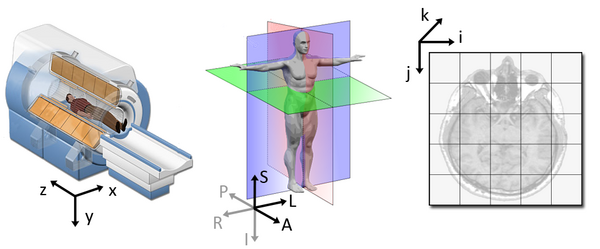

In [7]:
# from IPython.display import Image
Image("../static/images/coordinate_systems.png", width=500)

#Sourced from: https://www.slicer.org/wiki/Coordinate_systems

In [40]:
t1_affine = t1_img.affine
t1_affine

array([[   1.        ,    0.        ,    0.        ,  -86.24172211],
       [   0.        ,    1.        ,    0.        , -114.76040649],
       [   0.        ,    0.        ,    1.        , -140.12008667],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

### Working With Image Data

#### Slicing

n-dimensional images are just stacks of numpy arrays.  Each value in the array is assigned to an x, y or z coordinate.  
<img src="../static/images/numpy_arrays.png" alt="Drawing" align="middle" width="500px"/>

You'll recall our example T1w image is a 3D image with dimensions $176 \times 256 \times 256$.

Slicing does exactly what it seems to imply. Giving our 3D volume, we pull out a 2D slice of our data. Here's an example of slicing from left to right (**sagittal slicing**):

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Parasagittal_MRI_of_human_head_in_patient_with_benign_familial_macrocephaly_prior_to_brain_injury_%28ANIMATED%29.gif"/>

This gif is a series of 2D images or **slices** moving from left to right. We'll now look into how we can pull slices from our 3D image

***
Sourced from: https://en.wikipedia.org/wiki/Neuroimaging#/media/File:Parasagittal_MRI_of_human_head_in_patient_with_benign_familial_macrocephaly_prior_to_brain_injury_(ANIMATED).gif

***

Note that we have two ways of working with neuroimaging data. 


1. We have the actual <code>t1_img</code> we loaded using <code>nibabel</code>
2. We have the array we pulled from <code>t1_img</code> in the form of <code>t1_data</code>


For each of these representations of our data we can pull "slices" using different methods.


First we'll work with the array in the form of <code>t1_img</code>. Since this is a <code>numpy</code> array, we can use the same method as we'd use when dealing with 3D arrays in python (R and MATLAB are very similar here!).

In [41]:
#Pull the 10th "sagittal slice"
sagittal_slice = t1_data[10,:,:]

Notice the following structure: 

1. We can **index** an array using the array followed by square brackets as follows t1_data[x,y,z]

With our data:
- <code>x</code> is the left to right index
- <code>y</code> is the back to front index
- <code>z</code> is the bottom to top index


So here we're selecting the 10th slice going from left to right (there are 176 slices going from left to right!)

The <code>:</code>, indicates that we want to grab *everything*. 

In plain english we want to:

**Move 10 spots from the left, then grab a full 2D picture here**

<b>EXERCISE:</b> Now try selecting the 70th slice from the back (this is called a **coronal slice**).
It helps to think of this as follows:

Move 70 spots from the back, then grab the full 2D picture here. 

In [46]:
coronal_slice = t1_data[:,70,:]

Finally try grabbing a **axial slice**, specifically the 126th slice from the bottom:

In [43]:
axial_slice = t1_data[:,:,126]

As mentioned earlier we can also slice using <code>t1_img</code>, which we loaded through <code>nibabel</code>. It's sometimes nicer to work with this since we don't have to deal with arrays directly like we did with <code>t1_data</code>. 

Slicing with <code>t1_img</code> is just as straightforward and involves using <code>t1_img.slicer[x,y,z]</code>, but with a single caveat which we'll demonstrate here using the 10th slice from the left:

In [44]:
sagittal_slice = t1_img.slicer[10:11,:,:]

Notice the difference? Here we have to format a sagittal slice as follows:

<code>t1_img.slicer[ (slice) :  (slice# +1) ,:,:]</code>

This is just a result of how <code>slicer</code> is programmed, but everything else remains the same. 

**Exercise**

Use <code>t1_img.slicer</code> to select the:

1. 70th coronal slice from the back
2. 126th axial slice from the bottom

In [45]:
#Coronal slice
coronal_slice = t1_img.slicer[:,70:71,:]

In [18]:
#Axial Slice
axial_slice = t1_img.slicer[:,:,126:127]

We've been slicing and dicing brain images but we have no idea what they look like! In the next section we'll show you how you can visualize brain slices using <code>nibabel</code>!

#### Visualizing
If we wanted to get a quick view of our data, Nibabel provides this functionality through a method called <code>orthoview()</code>. Here's how it looks in action

In [19]:
import matplotlib.pyplot as plt

<OrthoSlicer3D: ../data/ds000030/sub-10171/anat/sub-10171_T1w.nii.gz (176, 256, 256)>

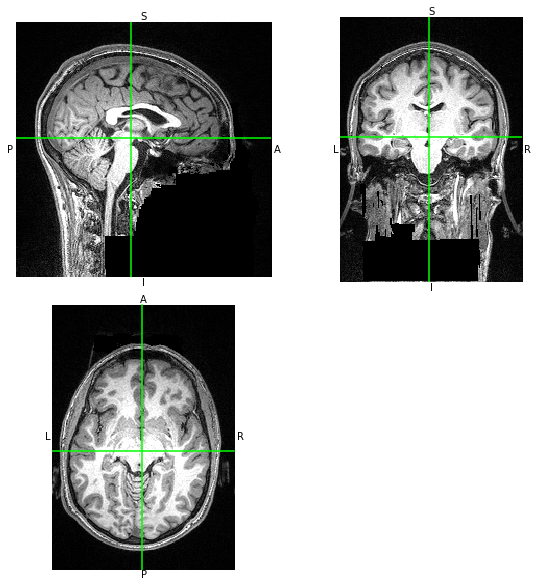

In [20]:
t1_img.orthoview()

But what if we wanted to view *the central slice?*. With <code>orthoview()</code>, we can only get a quick peek at the data. Nibabel also provides a tool called <code>nib.viewers.OrthoSlicer3D</code> which can help us be a bit more picky about how we want to view our images:

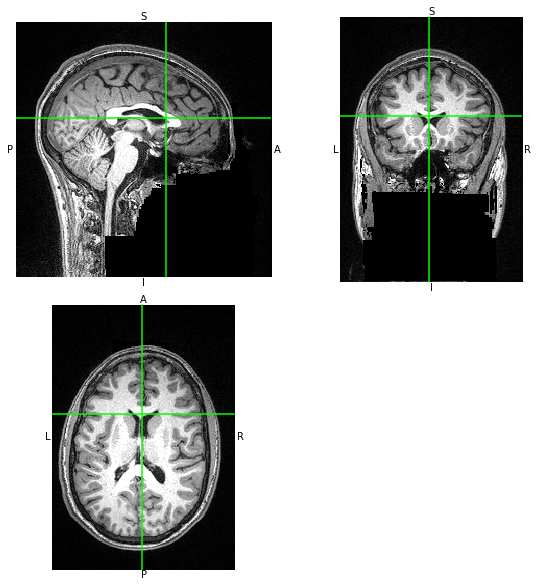

In [21]:
slicer_viewer = nib.viewers.OrthoSlicer3D(t1_img.get_data())
slicer_viewer.set_position(x=86,y=150,z=160)

#### Reshaping

NumPy has a `reshape()` function for reshaping the data array. Let's say we want to convert this 3D array into a a 2D array.

In [23]:
import numpy as np

t1_data_2d = t1_data.reshape(np.prod(t1_data.shape[:-1]), t1_data.shape[-1])
t1_data_2d.shape

(45056, 256)

### Masks
Next, we will see how to segment the brain from the black background.

(array([7.56166e+06, 5.36042e+05, 2.32237e+05, 1.84407e+05, 1.72410e+05,
        1.71352e+05, 1.87736e+05, 2.00251e+05, 2.37394e+05, 2.74456e+05,
        2.92424e+05, 2.71461e+05, 2.36554e+05, 1.76366e+05, 1.44701e+05,
        1.26720e+05, 1.17393e+05, 1.11181e+05, 1.06030e+05, 8.06560e+04,
        5.24960e+04, 2.98200e+04, 1.47990e+04, 7.07100e+03, 3.55900e+03,
        2.13700e+03, 1.10800e+03, 7.17000e+02, 3.94000e+02, 2.50000e+02,
        1.60000e+02, 8.80000e+01, 7.60000e+01, 5.50000e+01, 3.00000e+01,
        3.80000e+01, 2.40000e+01, 1.60000e+01, 1.60000e+01, 1.00000e+01,
        1.30000e+01, 9.00000e+00, 5.00000e+00, 5.00000e+00, 2.00000e+00,
        2.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([  0.  ,  19.16,  38.32,  57.48,  76.64,  95.8 , 114.96, 134.12,
        153.28, 172.44, 191.6 , 210.76, 229.92, 249.08, 268.24, 287.4 ,
        306.56, 325.72, 344.88, 364.04, 383.2 , 402.36, 421.52, 440.68,
        459.84, 479.  , 498.16, 517.32, 536.48, 555.

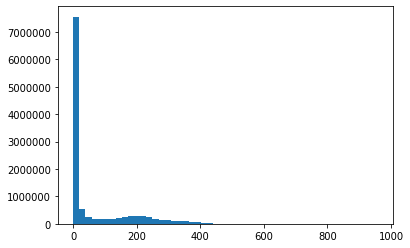

In [24]:
plt.hist(t1_data.flatten(), bins = 50)

In [25]:
t1_mask = t1_data > 100

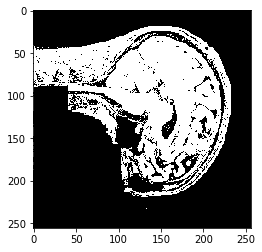

In [26]:
plt.imshow(t1_mask[87, :, :], cmap = 'gray')

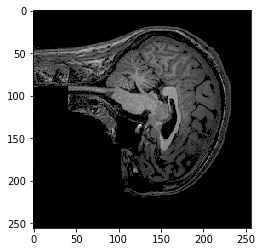

In [27]:
test = np.where(t1_mask, t1_data, 0)
plt.imshow(test[87, :, :], cmap = 'gray')

### Writing NIfTI Images

Let's save the mask we just created to a file.

In [28]:
img_mask = nib.Nifti1Image(test, t1_affine, t1_hdr)

NameError: name 't1_affine' is not defined

In [ ]:
img_mask.to_filename('../data/test_mask.nii.gz')